In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("../data/USvideos.csv")

In [4]:
df_n = df.fillna({"description":df["title"]}) # Llenamos valores faltantes.
df = df_n

In [ ]:
df_c = df[["views", "dislikes", "likes", "comment_count", "lat", "lon"]]
# Al haber una gran distribución desigual, se aplicará una transformación
df_c["likes"] = np.log10(df_c["likes"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["likes"])  # Inversa de logaritmo natural
df_c["dislikes"] = np.log10(df_c["dislikes"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["dislikes"])  # Inversa de logaritmo natural
df_c["views"] = np.log10(df_c["views"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["views"])  # Inversa de logaritmo natural
df_c["comment_count"] = np.log10(df_c["comment_count"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["comment_count"])  # Inversa de logaritmo natural
df_c["lat"] = np.log10(df_c["lat"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["lat"])  # Inversa de logaritmo natural
df_c["lon"] = np.log10(df_c["lon"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["lon"])  # Inversa de logaritmo natural
df_c["lat"] = np.log10(df_c["lat"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["lat"])  # Inversa de logaritmo natural
df_c["lon"] = np.log10(df_c["lon"] + 1)  # Se agrega 1 para evitar log(0)
np.expm1(df_c["lon"])  # Inversa de logaritmo natural

C:\Users\Crost\AppData\Local\Temp\ipykernel_15988\3510208808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b["likes"] = np.log(df_b["likes"] + 1)  # Se agrega 1 para evitar log(0)
C:\Users\Crost\AppData\Local\Temp\ipykernel_15988\3510208808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b["dislikes"] = np.log(df_b["dislikes"] + 1)  # Se agrega 1 para evitar log(0)
C:\Users\Crost\AppData\Local\Temp\ipykernel_15988\3510208808.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
40944   NaN
40945   NaN
40946   NaN
40947   NaN
40948   NaN
Name: lon, Length: 40949, dtype: float64

<Axes: >

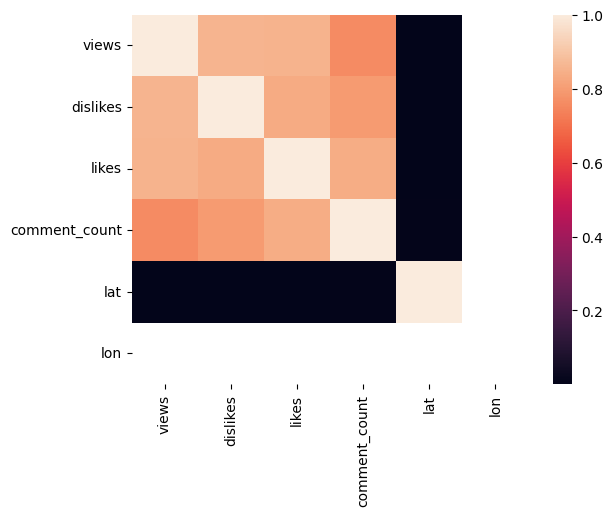

In [7]:
sns.heatmap(df_b.corr())

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [14]:
X = df_b[['views', 'comment_count', 'dislikes']]
y = df_b['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [15]:
regr = LinearRegression()
regr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
Y_pred = regr.predict(X_test)
pred3 = pd.DataFrame(X_test)
pred3 = pred3.assign(Likes=y_test)
pred3 = pred3.assign(Pred = Y_pred.flatten().tolist())
pred3.head(7)

,views,comment_count,dislikes,Likes,Pred
8013,12.328034,6.637258,6.591674,8.255828,8.826270
34432,13.796597,8.626406,8.419801,10.290381,10.720251
27178,12.933148,8.246958,6.104793,9.471550,9.686208
39195,15.051972,9.120087,9.950514,11.423220,11.848869
1742,12.286080,6.318968,5.075174,9.333531,8.386753
20077,13.787570,7.634337,7.074963,10.541307,10.059925
32892,13.826727,8.657129,7.047517,10.486122,10.485019


In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 0.6319303040470216
MSE: 0.7839507068326491
RMSE: 0.8854099089306879


C:\Users\Crost\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


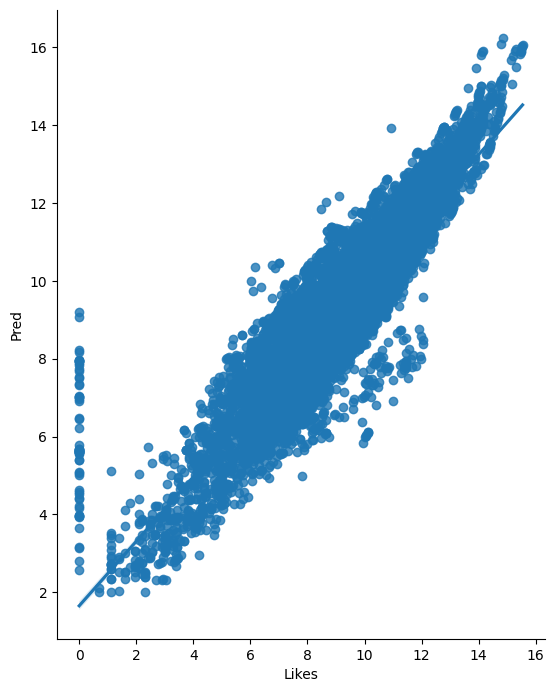

In [19]:
sns.pairplot(pred3, x_vars='Likes', y_vars='Pred', size=7, aspect=0.8,kind = 'reg')